### ASTR-324, University of Washington


# Week 3.1: The Normal Distribution and Descriptive Statistics

Typically, we collect some *samples* that can be thought of as being drawn from some underlying *continuous distribution*. For example, these samples could be:

 - the distribution of [exoplanet sizes](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1095/2016/11/03170348/OSC_Astro_21_05_Sizes.jpg)
 - the distribution of stars in the Milky Way
 - the distribution of [matter in the Universe](https://www.universetoday.com/wp-content/uploads/2010/12/cosmic_web_3smaller.jpg)
 - the average measurement and the distribution of measurement errors

This week we will learn how to develop our knowledge of the underlying distribution from its samples: starting with simple statistics (means, standard deviations), making estimates robust to outliers (medians, inter-quartile ranges), making histograms, and finally building up towards fitting models.

### Some notation

To introduce some notation that the textbook uses when discussing measurements:

* $h(x)$ is the probability density function (PDF) of a population from which samples are drawn.

* $x$ is a scalar quantity (a number), measured $N$ times

* $x_i$ is a single measurement with $i=1,...,N$

* $\{x_i\}$ refers to the set of all N measurements


## The Normal Distribution (Gaussian)

Before we talk about samples, let's introduce the arguably most important probability density distribution: the Normal Distribution (Gaussian).

The **Normal distribution** -- also know as the **Gaussian** -- has the following functional form:

$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

where you should read the left side as "probability of x given $(\mu, \sigma)$".

In [151]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# Male height in humans: https://ourworldindata.org/human-height#height-is-normally-distributed
mu=178.4
sigma=7.59

def example_gauss():
    ## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)
    ## see http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html
    ## Example: IQ is (by definition) distributed as N(mu=100,sigma=15)
    ## Let's plot the (infamous) IQ distribution.
    # generate distribution for a grid of x values
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(5, 3.75))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

### Properties of the Normal Distribution

A Gaussian gives us the familiar "bell-shaped" curve.

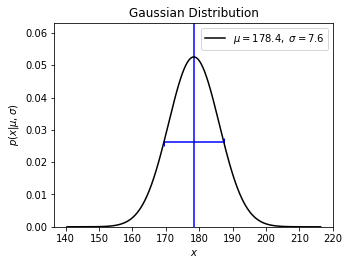

In [152]:
example_gauss()

It is centered at $\mu$ and its width is proportional to the $\sigma$ parameter. With a bit of straightforward but tedious math you can show that the width of the Gaussian at 1/2 of its maximum value is equal to:

$$ {\rm FWHM} = 2 \sqrt{2 \ln 2} \sigma \approx 2.355 \sigma $$

where FWHM stands for "full width at half-maximum".

Figure above: Male height in humans is normally distributed, with $\mu=178.4$ and $\sigma=7.59$ (https://ourworldindata.org/human-height#height-is-normally-distributed).

In [33]:
## above we used probability density function (astronomers like to call it "differential" df)
## the cumulative distribution function, cdf, is the integral of pdf from $x'=-\infty$ to $x'=x$

gaussCDF = norm(mu, sigma).cdf

def example_gauss_cdf():
    fig, ax = plt.subplots(figsize=(5, 3.75))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gaussCDF(x)
    plt.plot(x, y, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()

### Common Statistical Distributions in Python

The SciPy package for Python comes with a rich library of routines for dealing with statistical distributions in the `scipy.stats` module. These are documented [at their website](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

Each distribution is created by instantiating a class that describes it, and passing it any required parameters. For example the Normal distribution is `scipy.stats.norm` and to instantiate it with $\mu = 178.4$ and $\sigma=7.59$ we'd write:

In [90]:
import scipy.stats
h = scipy.stats.norm(178.4, 7.59)

This now gives us our $h(x)$. Getting the values of the PDF (or related functions such as the CDF or the PPF) becomes as easy as calling:

In [92]:
pdfval = h.pdf(178.4)
cdfval = h.cdf(178.4)  # explained further below
ppfval = h.ppf(0.5)    # explained further below

pdfval, cdfval, ppfval

(0.05256156527028099, 0.5, 178.4)

This frees us from having to type in the (sometimes complex) equations defining various distributions.

### Gaussian cumulative distribution function (CDF)

**Cumulative distribution function (CDF)** is the integral of the pdf:

$$\Phi(x') = \int_{-\infty}^{x'}  h(x)\,dx $$
$$\Phi(\infty) = 1.$$

and gives **the probability that x will take a value less than x'** (i.e., $x < x'$).

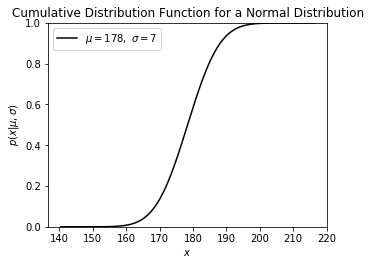

In [34]:
example_gauss_cdf()

### Using the CDF

What percentage of men are taller than 204cm?

In [71]:
frac = 1 - gaussCDF(204)
print(f"Fraction of men taller than 204cm (6ft8\"): {100*frac:.4f}%")

Fraction of men taller than 204cm (6ft8"): 0.0372%


## Percent-point Function: the inverse of the CDF

Which height corresponds to "one in a million"?

We'll use the **percent point function** (PPF) to find out. The PPF is simply the inverse of the CDF.

In [67]:
height = norm(mu, sigma).ppf(1 - 1.0e-6)

# norm.ppf returns x for specified cdf (ppf == Percent point function (it's the inverse of the cdf))
print(f'height = {height:.2f}cm')
print(f'nSigma = {(height - mu)/sigma:.2f}σ event')

height = 214.48cm
nSigma = 4.75σ event


Note: this assumes the distribution of heights is truly a Gaussian even in the extremes (the "tails"); it's not. There are more very tall persons than this simple model would predict.

### Gaussian confidence levels

The probability that a measurement drawn from a Gaussian distribution has a value in the interval $(\mu-a, \mu+b)$ is:

$$\int_{\mu-a}^{\mu+b} N(x \mid \mu,\sigma) dx.$$

For $a=b=1\sigma$, we get 68.3%. This is ***the meaning of the usual $\overline{x} \pm \sigma_{\overline{x}}$ notation*** when reporting measurements. Note this assumes the measurement averages $\overline{x}$ are normally distributed -- we'll soon justify why that's a generally good assumption.

For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits** at the 68% and 95% **confidence level**, respectively.

### We can also estimate by sampling

Let's now look at the same problems using a sample of million points drawn from the same normal distribution.

What does it mean for a sample to be "drawn from a distribution $h(x)$"? It means that the probability of some $x$ appearing in the sample will be proportional to $h(x)$. $h(1.3)$ twice as large as $h(2.5)$? Means we're twice as likely to find $1.3$ in the sample as $2.5$ (or there will be twice as many $1.3$ than $2.5$s).

(note: strictly speaking, because these are contiguous variables we should be talking about the probability of finding a number in some small, $\epsilon$-wide intervals around $1.3$ and $2.5$).

In [153]:
np.random.seed(42)
sampleSize=1_000_000

gaussSample = norm(mu, sigma).rvs(sampleSize) 

In [154]:
# What fraction of men have height>204cm?
tallOnes = gaussSample[gaussSample > 204]
print (100 * len(tallOnes) / sampleSize)

0.0365


In [148]:
# What height corresponds to "one in a million"?  
print(np.max(gaussSample))

213.91322367185933


In [1]:
# Examples
# adapted from https://matplotlib.org/gallery/statistics/histogram_features.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def example1():
    # example data
    mu = 1  # mean of distribution
    sigma = 0.2  # standard deviation of distribution
    num_samples = 10

    # generate the dataset
    np.random.seed(19790803)
    x = mu + sigma * np.random.randn(num_samples)
    bin_width = 3.5*sigma / num_samples**(1./3.)   # Compute bin width using Scott's rule (will be discussed below)
    bins = np.arange(0., 2., bin_width)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

    # set limits
    for ax in (ax1, ax2, ax3):
        ax.set_xlim(0., 2.)
        ax.set_ylim(0, 2.30)

    ############################################3

    ax1.set_title(r'Population PDF $h(\mu=%.1f, \sigma=%.1f)$' % (mu, sigma))

    ax2.set_title(r'Sample Histogram')
    n, bins, patches = ax2.hist(x, bins, density=1)

    ax3.set_title(r'Estimate of Location and Width')
    n, bins, patches = ax3.hist(x, bins, density=1)
    est_mu = x.mean()
    est_sigma = x.std(ddof=1)
    bins = np.arange(0., 2., 0.01)
    ymax = (1 / (np.sqrt(2 * np.pi) * est_sigma))
    ax3.axvline(est_mu, c='yellow')
    ax3.errorbar(est_mu, ymax / 2., xerr=np.sqrt(2.*np.log(2.))*est_sigma, c='yellow', capsize=4)
    print(f"Population: μ = {mu:.3f}, 𝜎 = {sigma:.3f}")
    print(f"    Sample: μ = {est_mu:.3f}, 𝜎 = {est_sigma:.3f}")

    #############################################

    # Overplot the population PDF on all three plots
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    for ax in (ax1, ax2, ax3):
        ax.plot(bins, y, '--r')
        ax.set_xlabel('Stellar position (in pixels)')
        ax.set_ylabel('Probability density')
        ax.set_facecolor((0.95, 0.95, 0.95))
        ax.plot(x, 0*x, '|', color='k', markersize=25); # N.B. markersize is in *points*

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()

This ends our brief tour of the normal distribution (the Gaussian) -- we'll use it on almost daily basis from now on!

## Descriptive statistics

Typically, we collect some *samples* (series of measurements, or catalogs of stars) that can be thought of as being drawn from some underlying *continuous distribution*. For example, this could be:

 - the distribution of [exoplanet sizes](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1095/2016/11/03170348/OSC_Astro_21_05_Sizes.jpg)
 - the distribution of stars in the Milky Way
 - the distribution of [matter in the Universe](https://www.universetoday.com/wp-content/uploads/2010/12/cosmic_web_3smaller.jpg)
 - the average measurement and the distribution of measurement errors

We frequently don't care much about the individual samples, other than to use them ***to learn more about the underlying distributions***.

What are some very basic properties we may want to know about a distribution?

A reasonable thing to ask may be were is it "localized" ("***location***") or what is its "size" ("***scale***"), etc. For example, the Gaussian below is clearly located around $x \sim 1$ and has a width of about $\sim 0.5$. We'd like to better define what "location" and "scale" mean for a distribution $h(x)$, and learn how to estimate those quantities from samples.

Location and scale are examples of ***descriptive statistics***. They are used to **quantify and summarize** the general features of distributions, as well as the collected data (i.e., a few numbers to describe the sample with).

Population: μ = 1.000, 𝜎 = 0.200
    Sample: μ = 1.042, 𝜎 = 0.196


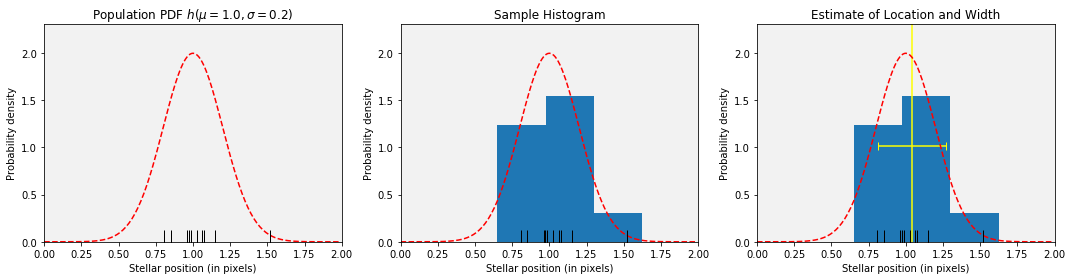

In [3]:
example1()

### Quantifying Location, 1st attempt: Mode

The mode is the most probable value, $x_m$, determined from the peak of the distribution, which is the value where the derivative is zero:

$$ \frac{dh(x)}{dx}\bigg\rvert_{x=x_m} \equiv 0$$

Distributions with a single mode (peak) are called ***unimodal***, those with two are ***bimodal***, and those with more than two are referred to as ***multimodal***.

Problem:
* Difficult to estimate from samples
* May be misleading for bimodal/multimodal distributions with sharp but narrow peaks

What we'd like is something that predicts the "average" value, not necessarily the most probable one.

### Quantifying Shapes of Distributions: Moments

Given a probability distribution function $h(x)$, we can define the ***expected value of some f(x)*** over that $h(x)$ as:

$$E[f(x)] \equiv \int_{-\infty}^{\infty} f(x) h(x) dx,$$

where $h(x)$ must be properly normalized (i.e., $\int_{-\infty}^{\infty} h(x) dx = 1$). f(x) can be an arbitrary function, including a constant. The expected value of $f(x)$ is ***the probability-weighted arithmetic mean of all its possible values.***

#### The Mean

If we set $f(x)=x$, and compute the expected value, we obtain the ***mean***:

$$\mu \equiv E[x] = \int_{-\infty}^{\infty} x h(x) dx$$

This is a ***definition*** of the mean -- a quantity which conveys where most of the probability density is located. We can therefore use it a ***"location parameter"***; it helps us quantify where the probability is.

If you evaluate it for the Gaussian (normal distribution):

$$ E_{N}[x] = \mu $$

.

#### The Variance

The ***variance*** is the expected value of $f(x)=(x-\mu)^2$:

$$V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

Again, it's a ***definition*** of a quantity that quantifies how wide is a distribution -- it's a ***"scale parameter"***. Very frequently we use its square root, $\sigma = \sqrt V$, known as the ***standard deviation***.

If we evaluate the variance for the Gaussian (normal distribution), we get:

$$ E_{N}[(x-\mu)^2] = \sigma^2 $$

(as you can see, the naming of $\sigma$ is not a coincidence).

#### Higher order moments

These two are just first two in an infinite series of ***moments*** -- quantitative measures of the shape of a distribution. Higher order moments tell us about whether the distribution is skewed, or has long "tails". 

In general, the expansion into moments is similar to an expansion into Fourier coefficients or a Taylor series: a way to describe a function, with increasing accuracy, using a series of numbers. There's more about this in the notebook, if you want to know the details.

**For the Gaussian, all moments higher than the variance are identically equal to zero.** It is the only distribution with this property.

### More about moments

![SlideGrab](figures/p8.jpg)

### More about moments: an expansion of an arbitrary function

A probability density function can be expanded into an infinite series of moments:

![Moments](figures/moments-expansion.png)

If truncated, this becomes an ***approximation***, with each additional term in the expansion adding more fidelity.

### More about moments: Caveats

Approximating the distribution with only a few numbers is convenient, but can have its downsides:

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. 

![SlideGrab](figures/AnscombeQuartet.jpg)

![SlideGrab](figures/AnscombeQuartetTable.jpg)



### Quantifying Sample Distributions

Values estimated from the functional form of $h(x)$, the true population PDF, are called ___population statistics___. E.g. $\mu$ is the *population mean*, i.e., it is the expected value of $x$ for $h(x)$.

But we generally don't *know* $h(x)$ -- we only have a sample (the result of our measurement)! What do we do then? How do we compute analogous values from a sample, and can we use them to estimate the population values?

**We pretend that the sample is our population.** Mathematically, its probability density function is then equal to:

$$ \hat{h}(x) = \sum_{i=1}^N \frac{\delta_(x - x_i)}{N}$$

where $\delta_(x - x_i)$ is the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function). We can now take the expected values over this **sample PDF**.

#### Sample Mean

Taking the expected value of $x$ over $\hat{h}(x)$, we derive the result for **sample mean**:

$$\overline{x} \equiv E_{\hat{h}}[x] = \frac{1}{N}\sum_{i=1}^N x_i,$$

which is the usual expression we're all familiar with. It gives us a sense of the general **location** of most samples and therefore the underlying distribution (though note there will be problems if the distribution is bimodal).

Statistics estimated from the data are called ___sample statistics___, which we use to estimate the analogous population values. We say the sample mean, $\overline{x}$, is an ***estimator*** of the population mean, $\mu$. We'll hear more about estimators next week.

#### Sample Variance

Similarly, the **sample variance** is found to be equal to:

$$\frac{1}{N}\sum_{i=1}^N (x_i-\overline{x})^2.$$

and is an *estimator* of the population variance, $\sigma^2$. It tells us something about the size, *the scale*, of the underlying population distribution.

More frequently (and in the textbook), we'll see the **corrected sample variance** being used:

$$s^2 \equiv \frac{1}{N-1}\sum_{i=1}^N (x_i-\overline{x})^2.$$

which is also an estimator of the population variance, $\sigma^2$, except that it is **unbiased**.

The square root of $s^2$ -- $s$ -- is known as the ***sample standard deviation***.

What does "biased" mean? It means that if we drew a large number of samples, and calculated the uncorrected $s^2$ for each sample, we'd notice that it typically *underestimates* the population variance $\sigma$. By how much it underestimates it depends on the size of the sample, $N$: from 20% for $N=2$, 3% for $N=10$, to becoming zero as $N \to \infty$.

This is related to the fact that $\overline{x}$ is also determined from data, rather than known a-priori -- see [this Wikipedia article](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias) for an intuitive explanation. With $N$ replaced by $N-1$ (the so-called Bessel’s correction), the sample variance $s^2$ becomes an unbiased estimator of the population variance $\sigma^2$.

### The physical origin of sample variance

Where does the variance -- the scatter -- in our sample come from (physically)? Depends on what the sample $\{ x_i \}$ is.

Assuming $\{ x_i \}$ is a series of measurements, there are two limiting but often realistic cases:

1. The quantity being measured has a defined value, but our measurement aparatus introduces some fixed (a priori unknown) measurement error $\sigma$. **Example: measuring the location of a particular quasar**. Our estimate $s$ therefore summarizes our knowledge of the precision of the apparatus.

2. We're measuring a quantity which has its own intrinsic scatter $\sigma$. **Example: the masses of all discovered exoplanets.** In this case, our estimate $s$ summarizes the measurement of that scatter (assuming the measurement error is negligible).

Real measurements are often a mix of the two.

### Bias vs. Precision vs. Accuracy

![SlideGrab](figures/p13.jpg)

This concludes our initial discussion of descriptive statistics.

We've introduced the concepts of location and scale parameters of PDFs, moments of distributions, mode, mean and variance, and how to compute all these on samples drawn from distributions.

We also discussed where the variance could be coming from (physically), and clarified the differences between bias, accuracy and precision.

## Standard Errors and the Central Limit Theorem

In [96]:
# Execute this cell
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

## Sample parameters as estimators of population parameters

As previously mentioned, our goal is typically to estimate the parameters of the population by studying a sample:

 * The location parameter $\mu$ for $h(x)$ is estimated using the **sample mean**: 

$$\overline{x} = \frac{1}{N}\sum_{i=1}^N x_i,$$

 * The scale parameter $\sigma$ is estimated using the **(corrected) sample standard deviation**:
 
$$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i-\overline{x})^2}$$

The numerical values of these estimators (the estimate) will NOT be *exactly* equal to $\mu$ and $\sigma$:

In [121]:
mu = 1.0             # mean of the gaussian
sigma = 0.1          # standard deviation of the gaussian

def draw(seed):
    np.random.seed(seed)
    x = norm(mu, sigma).rvs(10)
    return x, x.mean(), x.std(ddof=1)  # why the "ddof=1" argument to std? To apply the Bessel's correction

x, xmean, xsigma = draw(42);  print(f"First 5 samples: {x[:5]}, Mean: {xmean:.4f}, Sigma: {xsigma:.4f}")
x, xmean, xsigma = draw(68);  print(f"First 5 samples: {x[:5]}, Mean: {xmean:.4f}, Sigma: {xsigma:.4f}")
x, xmean, xsigma = draw(33);  print(f"First 5 samples: {x[:5]}, Mean: {xmean:.4f}, Sigma: {xsigma:.4f}")
x, xmean, xsigma = draw(88);  print(f"First 5 samples: {x[:5]}, Mean: {xmean:.4f}, Sigma: {xsigma:.4f}")
x, xmean, xsigma = draw(34);  print(f"First 5 samples: {x[:5]}, Mean: {xmean:.4f}, Sigma: {xsigma:.4f}")

First 5 samples: [1.04967142 0.98617357 1.06476885 1.15230299 0.97658466], Mean: 1.0448, Sigma: 0.0723
First 5 samples: [0.90555236 1.01999436 0.84596466 1.08380418 1.0394786 ], Mean: 1.0049, Sigma: 0.0727
First 5 samples: [0.96811465 0.83970194 0.84647821 0.94295991 0.97832717], Mean: 0.9820, Sigma: 0.1022
First 5 samples: [1.01068843 1.22058152 1.09565627 1.00684111 1.10685138], Mean: 1.0374, Sigma: 0.1034
First 5 samples: [1.02438351 0.92526818 0.8438823  0.95357469 0.96479377], Mean: 0.9804, Sigma: 0.0825


Can we quantify just how scattered will these estimates be?

The answer is yes. One [can show](http://www.planetofbits.com/statistics/standard-error-variance-of-mean-derivation/) that for large $N$ the scatter in $\overline{x}$ will have the standard deviation equal to:

$$ \sigma_\overline{x} = \frac{s}{\sqrt N} $$

which is known as the **standard error of the mean** (aka. the "error bar"). A stronger statement (which we'll discuss in just a bit) is that the scatter in $\overline{x}$ **follow the normal distribution with $\sigma=\sigma_\overline{x}$**.

Similarly, the standard deviation of the estimates of $\sigma$ can be shown to be equal to:

$$ \sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}} $$

(note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$ -- i.e., we don't have a good estimate of $s$).

### Standard Deviation vs. Standard Error

Note the difference between the ***standard deviation*** and and the ***standard error*** above. The former describes the property of the distribution we're attempting to estimate (i.e., how far is a typical individual sample away from the sample mean); the latter describes the precision of our estimate of some quantity (e.g., the mean itself).

Example:
* An average human is 1.65m (female) and 1.78 (male) tall. With enough measurements, the error of that estimate of the mean height can get almost arbitrarily small.
* Human height is approximately normally distributed, with a standard deviation of $7-8$ cm. No matter how many measurements we perform, the that standard deviation will not reduce -- it's the property of the population (and sample).

Fun fact: *"The people of the Dinaric Alps mainly South Slavs (Montenegro and East Herzegovina [and Croatia]) are on record as being the tallest in the world, with a male average height of 185.6 cm (6 ft 1.1 in) and female average height of 170.9 cm (5 ft 7.3 in)."* -- [Human height, Wikipedia](https://en.wikipedia.org/wiki/Human_height)

In [137]:
# useful function, to be used later
def plot_hist_of_means(means):
    fig, ax = plt.subplots(figsize=(10, 7.5))

    ## now plot the histogram of values in array 'means'
    ax.hist(means, bins=np.linspace(0.8, 1.2, 41), histtype='stepfilled', alpha=0.95, normed=True)

    ## Overplot the expected gaussian distribution
    xGrid = np.linspace(0, 2, 1000)
    gauss = norm(mu, sigma/np.sqrt(k)).pdf(xGrid)  # this is a function of x: gauss(x)
    plt.plot(xGrid, gauss, ls='-', c='blue', label='Expected $\overline{x}$')

    plt.xlim(0.8, 1.2)
    yMax = 1.2*np.sqrt(k)/np.sqrt(2*np.pi) / sigma 
    plt.ylim(0, yMax)
    plt.xlabel('$\overline{x}$')
    plt.ylabel(r'$p(\overline{x})$')
    plt.title(f'Distribution of M={M} sample means computed from k={k} sized samples drawn from a Gaussian')
    plt.legend()

def plot_hist_of_means_uniform(means, xmin=0.8, xmax=1.2, bins=51):
    # now plot the histogram of values in array means
    fig, ax = plt.subplots(figsize=(10, 7.5))
    # histogram the data
    ax.hist(means, bins=np.linspace(xmin, xmax, bins),
                histtype='stepfilled', alpha=0.5, normed=True)
    # expected gaussian distribution
    x = np.linspace(0, 2, 1000)
    sigmaU = W/np.sqrt(12.)
    gauss = norm(mu, sigmaU/np.sqrt(k)).pdf(x)
    plt.plot(x, gauss, ls='-', c='red', label='expected')
    plt.xlim(xmin, xmax)
    yMax = 1.2*np.sqrt(k)/np.sqrt(2*np.pi) / sigmaU
    plt.ylim(0, yMax)
    plt.xlabel('$\overline{x}$')
    plt.ylabel(r'$p(\overline{x})$')
    plt.title('Means of Uniform samples')
    plt.legend()
    plt.show()

### Numerical experiments: visualizing the standard error

Let's see how this looks in practice by doing a few numerical experiments. We'll:

* draw $k=20$ numbers from $N(\mu=1.0, \sigma=0.1)$ and compute their mean
* repeat this draw and computation M=10,000 times and plot the distribution of the obtained means

Will this distribution well described by $N(1.0, \frac{0.1}{\sqrt{k}})$, as we claimed above?

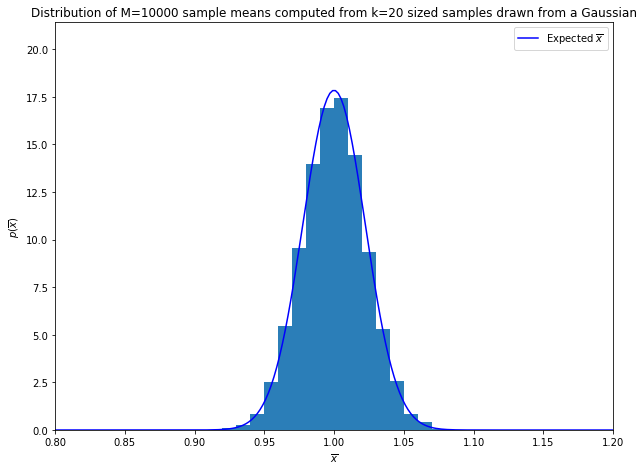

In [149]:
np.random.seed(42)   # ALWAYS SET THE RANDOM SEED!

k = 20               # number of samples in each draw
M = 10_000            # number of draws
mu = 1.0             # mean of the gaussian
sigma = 0.1          # standard deviation of the gaussian

## Performing M draws, and computing the mean for each
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu=1.0, sigma=0.1)
    means[i] = np.mean(x)
    
plot_hist_of_means(means)

That works!

What if we don't draw from a normal distribution, but instead from a [uniform distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)?

Let's first see one (largish) sample drawn from uniform distribution.

st.dev.= 0.14380787233055542


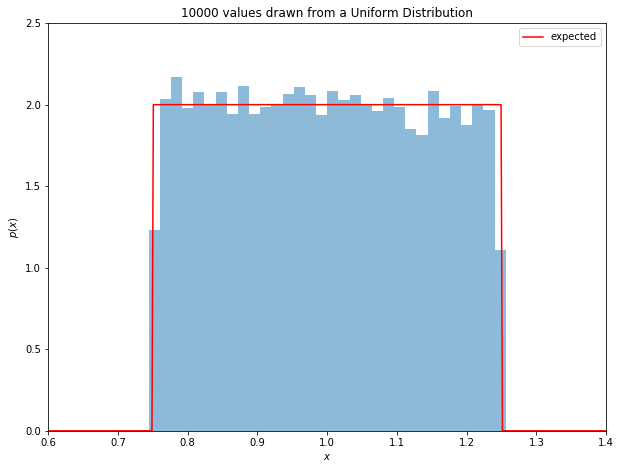

In [129]:
np.random.seed(42)   # ALWAYS SET THE RANDOM SEED!

W = 0.5              # width of the distribution
left = mu - 0.5 * W  # left edge

## Drawing from a uniform distribution
x = uniform(left, W).rvs(10000) # here we draw 10000 numbers
print('st.dev.=',np.std(x))     # calculate the standard deviation (should be W/sqrt(12))

# now plot the histogram of values in the 'means' array
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(x, bins=np.linspace(0.6, 1.4, 51), histtype='stepfilled', alpha=0.5, normed=True)

# expected uniform distribution
xGrid = np.linspace(0, 2, 1000)
flat = uniform(left, W).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, flat, ls='-', c='red', label='expected')
plt.xlim(0.6, 1.4)
plt.ylim(0, 2.5)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('10000 values drawn from a Uniform Distribution')
plt.legend()

Now let's look at the distribution of sample means:

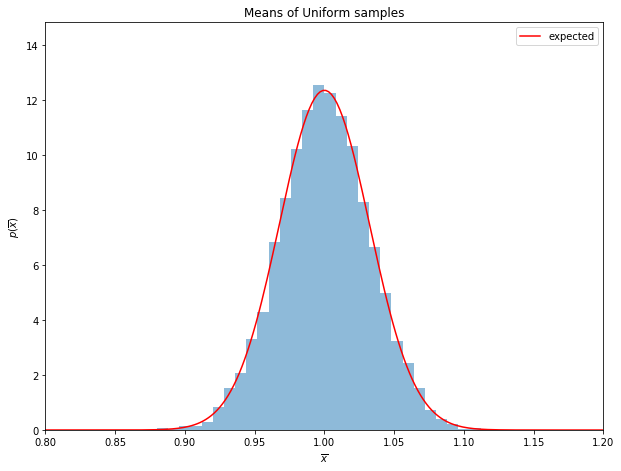

In [140]:
np.random.seed(42)   # ALWAYS SET THE RANDOM SEED!
k = 20

means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.75 and 1.25  
    means[i] = np.mean(x)

plot_hist_of_means_uniform(means)

Wow, it's again Gaussian (with the predicted scale)!

This is becoming interesting: it looks like it doesn't matter from which distribution we draw our sample! Does it depend on the sample size? 

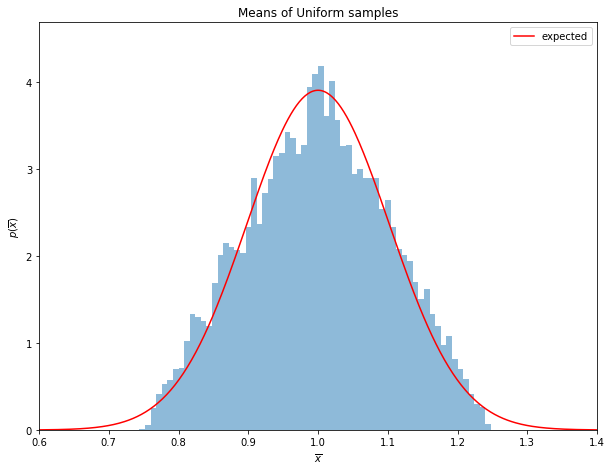

In [141]:
np.random.seed(42)   # ALWAYS SET THE RANDOM SEED!
k = 2

means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.75 and 1.25  
    means[i] = np.mean(x)

plot_hist_of_means_uniform(means, 0.6, 1.4, 101)

Now it is not such a good agreement any more!

Note: The blue histogram seems limited to the range from 0.75 to 1.25, why? 

## Why is the Gaussian the most important h(x)?

Because of the Central Limit Theorem:

> Given an *arbitrary distribution* $h(x)$, characterized by its location $\mu$ and scale $\sigma$, the mean of N values ${x_i}$ drawn from that distribution will approximately follow a Gaussian distributon $N(\mu, \sigma/\sqrt N)$, with the [approximation improving with N (the sample size)](https://www.astroml.org/book_figures/chapter3/fig_central_limit.html):

![CLT](https://www.astroml.org/_images/fig_central_limit_1.png)

The CLT can be proven using standard tools from statistics; e.g., a relatively readable proof of the CLT can be found at http://www.cs.toronto.edu/~yuvalf/CLT.pdf

## Why is the Gaussian the most important h(x)?

This is a remarkable result!

Remember that the standard error of the mean is equal to:

$$ \sigma_\overline{x} = \frac{s}{\sqrt N} $$

where $s$ is the estimate of the standard deviation of the distribution $h(x)$. The CLT tells us that our **accuracy will improve with $\sqrt N$ regardless of the details of the shape of $h(x)$**!

That is, we don't need to know the details of exactly how our apparatus is inaccurate (e.g., it may be adding some Gaussian noise to the measurements, or it may be randomly adding $\pm 1$ to the true value). The CLT guarantees that a mean of 10,000 measurements will be 10x as accurate as the mean of a 100 measurements *and* that the error on that estimate will follow a normal distribution.

(P.S.: as always, there are some exceptions and caveats which we'll address next time)

A handy cheat sheet to standard errors and deviations:

![SlideGrab](figures/standard-error.png)